# Chat2Image Creator Guide

- [ChatGPT API](https://platform.openai.com/docs/guides/chat) by OpenAI
- [Dreamlike Photoreal 2.0](https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0) by [Dreamlike Art](https://dreamlike.art/)

> Get OpenAI API key: https://platform.openai.com/account/api-keys

In [24]:
import openai

openai.api_key = '[YOUR-OPENAI-API-KEY-HERE]'

## ChatGPT API Tutorial

In [20]:
messages = [
    {'role': 'system', 'content': 'You are a helpful assistant.'},
    {'role': 'user', 'content': 'ChatGPT에 대해 설명해줘.'},
]

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

res

<OpenAIObject chat.completion id=chatcmpl-6pRXVWrHfZ6XmspaXP6OtFrEyaasn at 0x1e50eefaea0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "ChatGPT\ub294 \uc778\uacf5\uc9c0\ub2a5 \uae30\uc220\uc744 \uc774\uc6a9\ud558\uc5ec \uc0ac\uc6a9\uc790\uc640 \ub300\ud654\ud558\ub294 \uac00\uc0c1 \ube44\uc11c \uc11c\ube44\uc2a4\uc785\ub2c8\ub2e4. \uc0ac\uc6a9\uc790\uac00 \uc9c8\ubb38\uc744 \uc785\ub825\ud558\uba74 ChatGPT\ub294 \uc790\uc5f0\uc5b4 \ucc98\ub9ac \uae30\uc220\uc744 \uc774\uc6a9\ud558\uc5ec \uc9c8\ubb38\uc744 \uc774\ud574\ud558\uace0 \uc801\uc808\ud55c \ub2f5\ubcc0\uc744 \uc81c\uacf5\ud569\ub2c8\ub2e4.\n\nChatGPT\ub294 \uc77c\uc0c1 \uc0dd\ud65c\uc5d0\uc11c \uc720\uc6a9\ud55c \uc815\ubcf4\ub098 \uc11c\ube44\uc2a4\ub97c \uc81c\uacf5\ud558\ub294 \uac00\uc0c1 \ube44\uc11c\ub85c\uc11c, \uc601\ud654 \uc815\ubcf4, \uae30\uc0c1 \uc815\ubcf4, \uad50\ud1b5 \uc815\ubcf4\uc640 \uac19\uc774 \uc0ac\uc6a9\uc790\uac00 \ud544\uc694\ub85

In [21]:
msg = res['choices'][0]['message']['content']

msg

'ChatGPT는 인공지능 기술을 이용하여 사용자와 대화하는 가상 비서 서비스입니다. 사용자가 질문을 입력하면 ChatGPT는 자연어 처리 기술을 이용하여 질문을 이해하고 적절한 답변을 제공합니다.\n\nChatGPT는 일상 생활에서 유용한 정보나 서비스를 제공하는 가상 비서로서, 영화 정보, 기상 정보, 교통 정보와 같이 사용자가 필요로 하는 다양한 정보를 제공하며, 음악 재생, 알람 설정, 일정 관리, 쇼핑 등 다양한 생활 서비스도 제공합니다.\n\nChatGPT는 사용자의 정보를 안전하게 보호하며, 사용자의 대화 내용을 분석하여 점차적으로 답변의 정확도와 다양성을 높이는 기술을 사용하고 있습니다. 이를 통해 ChatGPT는 사용자의 요구에 최대한 맞는 답변을 제공하여 보다 나은 가상 비서 서비스를 제공하고 있습니다.'

In [22]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': '위의 문장을 50자로 요약해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

res['choices'][0]['message']['content']

'ChatGPT는 인공지능 가상비서로, 자연어 처리를 이용해 사용자와 대화하며, 일상 생활에서의 유용한 정보와 서비스를 제공합니다.'

## Dreamlike Photoreal Tutorial

In [26]:
from diffusers import StableDiffusionPipeline
import torch

model_id = 'dreamlike-art/dreamlike-photoreal-2.0'
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to('cuda')

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

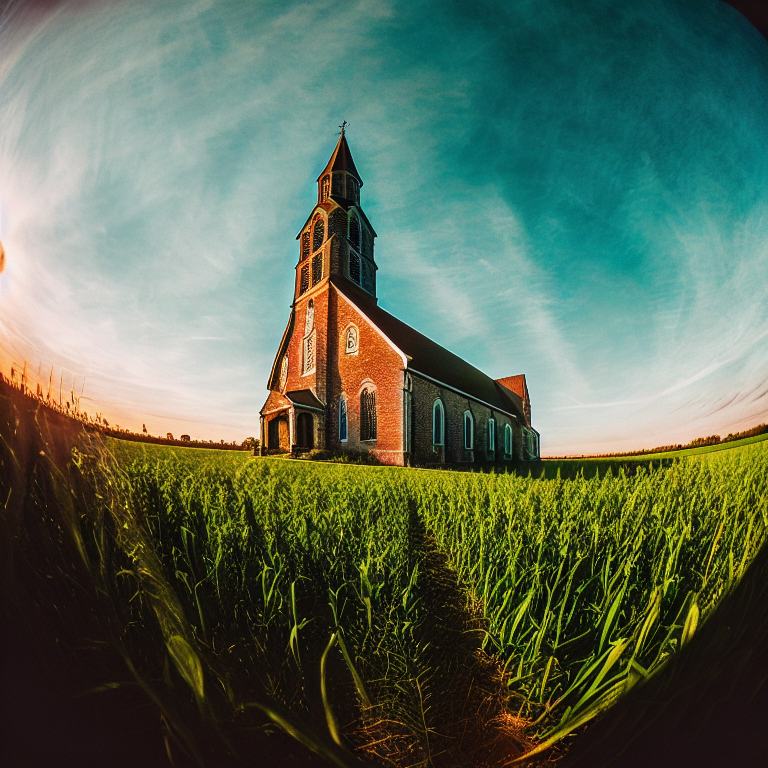

In [25]:
prompt = 'photo, a church in the middle of a field of crops, bright cinematic lighting, gopro, fisheye lens'

pipe(prompt).images[0]

## Process for Chat2Image Creator

In [57]:
messages = [{
    'role': 'system',
    'content': 'You are a helpful assistant for organizing prompt for generating images.'
}]

messages

[{'role': 'system',
  'content': 'You are a helpful assistant for organizing prompt for generating images.'}]

In [58]:
messages.append({
    'role': 'user',
    'content': '이 세상에 존재하지 않는 동물을 상상해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

msg = res['choices'][0]['message']['content']

msg

'공중을 날아 다니며 긴 꼬리와 빨간 날개를 가진 황금색 바람새.'

In [59]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': '이 동물의 외형을 더 자세하게 묘사해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

msg = res['choices'][0]['message']['content']

msg

'이 바람새는 길이가 약 60cm 정도이며, 몸무게는 매우 가볍습니다. 체색은 눈부실 정도로 황금빛이 도는 깃털로 뒤쪽에는 긴 꼬리가 달려있으며, 머리부분에는 독특한 두 개의 뿔 모양 깃털이 있습니다. 날개는 빨간색으로, 깃털 끝에는 노란색 줄무늬가 있어서 자연에 잘 어울립니다. 바람새는 아주 빠른 속도로 날아 다닐 수 있어서 공중에서 자유롭게 자신의 생활을 할 수 있습니다.'

In [60]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': '위 문장을 영어로 번역해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

msg = res['choices'][0]['message']['content']

msg

'Imagine an animal that does not exist in the world. A golden wind bird with long tail and red wings flying in the air. This bird is about 60 cm long and very light in weight. Its feathers are shining golden, and it has unique two feather-like horns on its head. The wings are red, with yellow stripes at the end of the feathers that seamlessly blend with nature. The wind bird can fly at a very fast speed, allowing it the freedom to live its life in the air.'

In [61]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': 'Condense the description to focus on nouns and adjectives separated by ,'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

prompt = res['choices'][0]['message']['content']

prompt

'animal, golden wind bird, long tail, red wings, 60 cm, light weight, shining golden feathers, two horn-like feathers, fast speed, freedom, air.'

  0%|          | 0/50 [00:00<?, ?it/s]

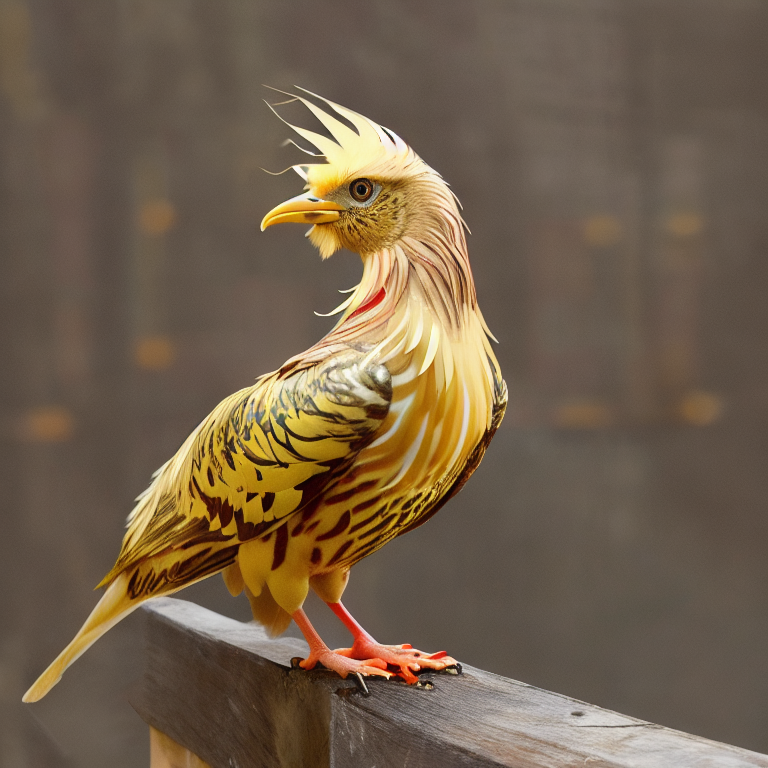

In [66]:
pipe(prompt).images[0]